## Import data

In [1]:
d <- read.csv('data_table_new.csv', h = T, sep = '\t')

In [2]:
head(d)

Video_ID video.number Stimulus verb.type..morphologically.
1 1        1            cry      intransitive               
2 2        2            cut      transitive                 
3 3        3            pull     transitive                 
4 4        4            kick     intransitive               
5 5        5            eat      transitive                 
6 6        6            give     ditransitive               
  verb.type..semantically. Predicate_produced Meeting_num
1 intransitive             cry                1          
2 transitive               do                 1          
3 transitive               play               1          
4 transitive               kick               1          
5 transitive               eat                1          
6 ditransitive             give               1          
  Sentence                                            
1 pʃəʃə-t͡sɘkˈʷɘ   ra-ɣɘ-∅ zgʷ(r)ə-m  faj-u            
2  peʕilut   ja-ʃ'ɘ-∅                                 
3 pʃəʃə-t͡sɘkˈʷ-ər    mə-gagʷɘ-∅                       
4 pʃ-əʃə-t͡sɘkˈʷ-χ-ə      t͡ʃɘɣɘ-m     jə-ʃʷtɘrɘ-χ      
5 pʃ-əʃə-t͡sɘkˈ-ə      ma-ʃχɘ-∅                        
6 ganə   r-j-ə-tɘ-∅   ji-ʃɘ   naħ-t͡ʃˈə                
  Translation                                 Speaker ⋯ Object_present
1 little Girl is crying for wanting something adam k  ⋯ NA            
2 doing an activity                           adam k  ⋯  1            
3 the little girl is playing                  adam k  ⋯ NA            
4 the little girls are kicking the tree       adam k  ⋯  1            
5 the little girl is eating                   adam k  ⋯ NA            
6 gives a shirt to his younger brother        adam k  ⋯  1            
  Object_number Obj_case.type Obj_marking..0.1.2..NA. ObjectNumber_verb
1 NA            NA            NA                      NA               
2 SG            zero          0                       SG               
3 NA            NA            NA                      NA               
4 SG            Ergative      2                       SG               
5 NA            NA            NA                      NA               
6 SG            NA            NA                      SG               
  another.Object_present Object_number.1 Obj_case.type.1
1 NA                                                    
2 NA                                                    
3 NA                                                    
4 NA                                                    
5 NA                                                    
6  1                     SG              NA             
  Obj_marking..0.1.2..NA..1 ObjectNumber_verb.1
1                                              
2                                              
3                                              
4                                              
5                                              
6 UI                        SG

In [3]:
colnames(d)

[1] "Video_ID"                    "video.number"               
 [3] "Stimulus"                    "verb.type..morphologically."
 [5] "verb.type..semantically."    "Predicate_produced"         
 [7] "Meeting_num"                 "Sentence"                   
 [9] "Translation"                 "Speaker"                    
[11] "Speaker_age"                 "Speakers_mother"            
[13] "Speakers_father"             "Word_order"                 
[15] "Subject_present"             "Subject_number"             
[17] "Subj_case_type"              "Subject_CaseMarking"        
[19] "SubjectNumber_Verb"          "Object_present"             
[21] "Object_number"               "Obj_case.type"              
[23] "Obj_marking..0.1.2..NA."     "ObjectNumber_verb"          
[25] "another.Object_present"      "Object_number.1"            
[27] "Obj_case.type.1"             "Obj_marking..0.1.2..NA..1"  
[29] "ObjectNumber_verb.1"

## Separate and check data

In [4]:
d.parents <- droplevels(d[ is.na(d$Speakers_mother), ]) # drop unused speakers, i.e. children
dim(d.parents)

[1] 480  29

In [5]:
table(d.parents$Speaker)


 adam k  amal n   ari t fatma k  hana n haron n  lana t salim n 
     60      60      60      60      60      60      60      60 

In [6]:
d.children <- droplevels(d[ !is.na(d$Speakers_mother), ]) # drop unused speakers, i.e. parents

dim(d.children)

[1] 240  29

In [7]:
table(d.children$Speaker)


bibars n  dana k    dana t  liana n 
      60       60       60       60 

## Add a variable for generation

In [8]:
d$generation <- factor(ifelse(is.na(d$Speakers_mother), 'parent', 'child'))

In [9]:
table(d$generation)


 child parent 
   240    480 

## SOV vs. non-SOV in parents and children

In [10]:
# For all sententences

table(d$generation, d$Word_order == 'SOV')

        
         FALSE TRUE
  child    192   48
  parent   229  251

In [11]:
# Test for significance

chisq.test(table(d$generation, d$Word_order == 'SOV'))

# p-value is < 0.001 --- children use SOV significantly more rarely than parents


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(d$generation, d$Word_order == "SOV")
X-squared = 67.385, df = 1, p-value = 2.233e-16


In [12]:
# Only for sentences with overt subjects and objects

xtabs(~ generation + I(Word_order == 'SOV'), data = d[ d$Subject_present + d$Object_present == 2, ])

          I(Word_order == "SOV")
generation FALSE TRUE
    child     57   48
    parent   109  250

In [13]:
chisq.test(xtabs(~ generation + I(Word_order == 'SOV'), data = d[ d$Subject_present + d$Object_present == 2, ]))

# p-value is again < 0.001 --- children use SOV significantly more rarely than parents
# also in sentences with overt subjects and objects


	Pearson's Chi-squared test with Yates' continuity correction

data:  xtabs(~generation + I(Word_order == "SOV"), data = d[d$Subject_present +     d$Object_present == 2, ])
X-squared = 19.208, df = 1, p-value = 1.172e-05


## The omission of subject in sentences of different types

In [14]:
xtabs(~ generation + Subject_present, data = d)

          Subject_present
generation   0   1
    child  111 129
    parent  31 449

In [15]:
chisq.test(xtabs(~ generation + Subject_present, data = d))

# p.value < 0.001 --- children on average omit subjects significantly more often


	Pearson's Chi-squared test with Yates' continuity correction

data:  xtabs(~generation + Subject_present, data = d)
X-squared = 157.51, df = 1, p-value < 2.2e-16


In [16]:
xtabs(~ generation + Subject_present + verb.type..morphologically., data = d)

# Children omit subject in around half of the cases in sentences
# with all kinds of verbs. Parents very rarely omit subjects,
# except for ditransitive sentences.

, , verb.type..morphologically. = ditransitive

          Subject_present
generation   0   1
    child    8   8
    parent   4  28

, , verb.type..morphologically. = intransitive

          Subject_present
generation   0   1
    child   56  72
    parent  10 246

, , verb.type..morphologically. = transitive

          Subject_present
generation   0   1
    child   47  49
    parent  17 175


### All differences are significant

In [17]:
# 4 in one of the cells; using Fisher's exact test; p = 0.01, significant
fisher.test(xtabs(~ generation + Subject_present, data = d[ d$verb.type..morphologically. == 'ditransitive', ]))


	Fisher's Exact Test for Count Data

data:  
p-value = 0.01076
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.369772 38.900515
sample estimates:
odds ratio 
  6.658658 


In [18]:
chisq.test(xtabs(~ generation + Subject_present, data = d[ d$verb.type..morphologically. == 'intransitive', ]))

# p-value < 0.001


	Pearson's Chi-squared test with Yates' continuity correction

data:  xtabs(~generation + Subject_present, data = d[d$verb.type..morphologically. ==     "intransitive", ])
X-squared = 92.398, df = 1, p-value < 2.2e-16


In [19]:
chisq.test(xtabs(~ generation + Subject_present, data = d[ d$verb.type..morphologically. == 'transitive', ]))

# p-value < 0.001


	Pearson's Chi-squared test with Yates' continuity correction

data:  xtabs(~generation + Subject_present, data = d[d$verb.type..morphologically. ==     "transitive", ])
X-squared = 57.257, df = 1, p-value = 3.824e-14


## Case marking in sentences of different types

### Intransitive sentences (expect absolutive)

In [20]:
xtabs(~ generation + Subj_case_type,
    data = d[ d$verb.type..semantically. == 'intransitive', ],
    addNA = TRUE)

# Children often omit subjects, not many data points

          Subj_case_type
generation Absolutive Ergative UI zero <NA>
    child           9        2  5    2   14
    parent         56        3  4    1    0

In [21]:
xtabs(~ generation + Subj_case_type,
    data = droplevels(d[ (d$verb.type..semantically. == 'intransitive') &
             (d$Subj_case_type %in% c('Absolutive', 'Ergative')), ]))

          Subj_case_type
generation Absolutive Ergative
    child           9        2
    parent         56        3

In [22]:
fisher.test(
    xtabs(~ generation + Subj_case_type,
          data = droplevels(d[(d$verb.type..semantically. == 'intransitive') &
                              (d$Subj_case_type %in% c('Absolutive', 'Ergative')), ])
         )
)

# p-value > 0.05, difference is _not_ significant.


	Fisher's Exact Test for Count Data

data:  
p-value = 0.1727
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.02457721 3.35332728
sample estimates:
odds ratio 
 0.2482249 


### Transitive + transitive (expect ergative for subject and absolutive for objects)

In [23]:
# Check NAs

xtabs(~ generation + I((Subj_case_type == 'Ergative') & (Obj_case.type == 'Absolutive')),
    data = d[(d$verb.type..semantically. == 'transitive') & (d$verb.type..morphologically. == 'transitive'), ],
    addNA = TRUE)

          I((Subj_case_type == "Ergative") & (Obj_case.type == "Absolutive"))
generation FALSE TRUE <NA>
    child     62    8   26
    parent    92   84   16

In [24]:
# Without NAs

xtabs(~ generation + I((Subj_case_type == 'Ergative') & (Obj_case.type == 'Absolutive')),
    data = d[(d$verb.type..semantically. == 'transitive') & (d$verb.type..morphologically. == 'transitive'), ])

          I((Subj_case_type == "Ergative") & (Obj_case.type == "Absolutive"))
generation FALSE TRUE
    child     62    8
    parent    92   84

In [25]:
chisq.test(xtabs(~ generation + I((Subj_case_type == 'Ergative') & (Obj_case.type == 'Absolutive')),
    data = d[(d$verb.type..semantically. == 'transitive') & (d$verb.type..morphologically. == 'transitive'), ]))

# p.value < 0.001, the difference between generations in adhering to the
# expected type is significant


	Pearson's Chi-squared test with Yates' continuity correction

data:  xtabs(~generation + I((Subj_case_type == "Ergative") & (Obj_case.type ==     "Absolutive")), data = d[(d$verb.type..semantically. == "transitive") &     (d$verb.type..morphologically. == "transitive"), ])
X-squared = 26.656, df = 1, p-value = 2.431e-07


### Transitive + intransitive (expect absolutive for subject and ergative for objects)

In [26]:
# Check NAs

xtabs(~ generation + I((Subj_case_type == 'Absolutive') & (Obj_case.type == 'Ergative')),
    data = d[(d$verb.type..semantically. == 'transitive') & (d$verb.type..morphologically. == 'intransitive'), ],
    addNA = TRUE)

          I((Subj_case_type == "Absolutive") & (Obj_case.type == "Ergative"))
generation FALSE TRUE <NA>
    child     41   21   34
    parent    45  132   15

In [27]:
xtabs(~ generation + I((Subj_case_type == 'Absolutive') & (Obj_case.type == 'Ergative')),
    data = d[(d$verb.type..semantically. == 'transitive') & (d$verb.type..morphologically. == 'intransitive'), ])

          I((Subj_case_type == "Absolutive") & (Obj_case.type == "Ergative"))
generation FALSE TRUE
    child     41   21
    parent    45  132

In [28]:
chisq.test(xtabs(~ generation + I((Subj_case_type == 'Absolutive') & (Obj_case.type == 'Ergative')),
    data = d[(d$verb.type..semantically. == 'transitive') & (d$verb.type..morphologically. == 'intransitive'), ],
    addNA = TRUE))

# The difference is again significant


	Pearson's Chi-squared test

data:  xtabs(~generation + I((Subj_case_type == "Absolutive") & (Obj_case.type ==     "Ergative")), data = d[(d$verb.type..semantically. == "transitive") &     (d$verb.type..morphologically. == "intransitive"), ], addNA = TRUE)
X-squared = 63.093, df = 2, p-value = 1.993e-14


## Check for syntactic transitivity in transitive+transitive sentences

In [29]:
# We define what counts as transitive (2 possible cases) and subset the data (4 conditions)

xtabs(~ generation +
      I(
        ((Subj_case_type == 'Ergative') & (Obj_case.type == 'Absolutive')) |
        ((Subj_case_type == 'Ergative') & (Obj_case.type %in% c('zero', 'Zero')))
        ),
      data = d[ 
          (d$Subject_present == 1) &
              (d$Object_present == 1) &
                  (d$verb.type..semantically. == 'transitive') & 
                    (d$verb.type..morphologically. == 'transitive'), ]
)

          I(((Subj_case_type == "Ergative") & (Obj_case.type == "Absolutive")) | ((Subj_case_type == "Ergative") & (Obj_case.type %in% c("zero", "Zero"))))
generation FALSE TRUE
    child     29   18
    parent    28  117

In [30]:
chisq.test(xtabs(~ generation +
      I(
        ((Subj_case_type == 'Ergative') & (Obj_case.type == 'Absolutive')) |
        ((Subj_case_type == 'Ergative') & (Obj_case.type %in% c('zero', 'Zero')))
        ),
      data = d[ 
          (d$Subject_present == 1) &
              (d$Object_present == 1) &
                  (d$verb.type..semantically. == 'transitive') & 
                    (d$verb.type..morphologically. == 'transitive'), ]
))

# p-value < 0.001, parents use transitive syntax significantly more often


	Pearson's Chi-squared test with Yates' continuity correction

data:  xtabs(~generation + I(((Subj_case_type == "Ergative") & (Obj_case.type ==     "Absolutive")) | ((Subj_case_type == "Ergative") & (Obj_case.type %in%     c("zero", "Zero")))), data = d[(d$Subject_present == 1) &     (d$Object_present == 1) & (d$verb.type..semantically. ==     "transitive") & (d$verb.type..morphologically. == "transitive"),     ])
X-squared = 28.561, df = 1, p-value = 9.081e-08


## Dependence of children on parents

In [32]:
# Reshape the data so that we could easily compare children with their parents
# on the same stimuli.

# Instead of a separate column for each variable, we have a column named "variable"
# and a column named "value". Later we will compare values for each variable between
# children and their parents.

library(reshape)

# The id columns identify the stimulus.
# Each stimulus produced several variables,
# and there are two values for each variable
# for each stimulus
d.children.melt <- melt(d.children, id = c(
    'Video_ID',
    'video.number',
    'Stimulus',
    'verb.type..morphologically.',
    'verb.type..semantically.',
    'Predicate_produced',
    'Meeting_num',
    'Sentence',
    'Translation', 
    'Speaker',
    'Speaker_age',
    'Speakers_mother',
    'Speakers_father'
))

In [33]:
dim(d.children.melt)
colnames(d.children.melt)

[1] 3840   15

[1] "Video_ID"                    "video.number"               
 [3] "Stimulus"                    "verb.type..morphologically."
 [5] "verb.type..semantically."    "Predicate_produced"         
 [7] "Meeting_num"                 "Sentence"                   
 [9] "Translation"                 "Speaker"                    
[11] "Speaker_age"                 "Speakers_mother"            
[13] "Speakers_father"             "variable"                   
[15] "value"

In [34]:
# Select variables for analysis
d.children.melt <- d.children.melt[, c('video.number',
                                       'verb.type..morphologically.',
                                       'verb.type..semantically.',
                                       'Speaker',
                                       'Speaker_age',
                                       'Speakers_mother',
                                       'Speakers_father',
                                       'variable',
                                       'value')
                                  ]

In [35]:
head(d.children.melt)

video.number verb.type..morphologically. verb.type..semantically. Speaker
1 1            intransitive                intransitive             dana k 
2 2            transitive                  transitive               dana k 
3 3            transitive                  transitive               dana k 
4 4            intransitive                transitive               dana k 
5 5            transitive                  transitive               dana k 
6 6            ditransitive                ditransitive             dana k 
  Speaker_age Speakers_mother Speakers_father variable   value
1 05:01       fatma k         adam k          Word_order SV   
2 05:01       fatma k         adam k          Word_order SV   
3 05:01       fatma k         adam k          Word_order SOV  
4 05:01       fatma k         adam k          Word_order VOS  
5 05:01       fatma k         adam k          Word_order OVS  
6 05:01       fatma k         adam k          Word_order SOV

In [36]:
# Repeat the procedure for the parents
d.parents.melt <- melt(d.parents, id = c(
    'Video_ID',
    'video.number',
    'Stimulus',
    'verb.type..morphologically.',
    'verb.type..semantically.',
    'Predicate_produced',
    'Meeting_num',
    'Sentence',
    'Translation', 
    'Speaker',
    'Speaker_age',
    'Speakers_mother',
    'Speakers_father'
))
d.parents.melt <- d.parents.melt[, c('video.number',
                                      'verb.type..morphologically.',
                                      'verb.type..semantically.',
                                      'Speaker',
                                      'variable',
                                      'value')]

In [37]:
# Two values for each variable

dim(d.parents.melt)

colnames(d.parents.melt)

[1] 7680    6

[1] "video.number"                "verb.type..morphologically."
[3] "verb.type..semantically."    "Speaker"                    
[5] "variable"                    "value"

In [38]:
d.parents.melt$value <- as.character(d.parents.melt$value)
d.children.melt$value <- as.character(d.children.melt$value)

In [39]:
# remove empty values

d.parents.melt <- d.parents.melt[ !is.na(d.parents.melt$value), ]
d.parents.melt <- d.parents.melt[ d.parents.melt$value != '', ]
d.parents.melt <- d.parents.melt[ d.parents.melt$value != 'UI', ]

d.children.melt <- d.children.melt[ !is.na(d.children.melt$value), ]
d.children.melt <- d.children.melt[ d.children.melt$value != '', ]
d.children.melt <- d.children.melt[ d.children.melt$value != 'UI', ]

In [40]:
dim(d.children.melt)

[1] 2119    9

Now we have one or two values for each variable for each stimulus.

In [251]:
head(aggregate(value ~ ., FUN = function(x) { paste(trimws(unlist(x)), collapse=",") }, data = d.children.melt))

video.number verb.type..morphologically. verb.type..semantically. Speaker
1  6           ditransitive                ditransitive             dana k 
2 13           ditransitive                ditransitive             dana k 
3  1           intransitive                intransitive             dana k 
4 16           intransitive                intransitive             dana k 
5 17           intransitive                intransitive             dana k 
6 21           intransitive                intransitive             dana k 
  Speaker_age Speakers_mother Speakers_father variable   value   
1 05:01       fatma k         adam k          Word_order SOV,SVOR
2 05:01       fatma k         adam k          Word_order SVO,SVO 
3 05:01       fatma k         adam k          Word_order SV,OV   
4 05:01       fatma k         adam k          Word_order VS,V    
5 05:01       fatma k         adam k          Word_order VS      
6 05:01       fatma k         adam k          Word_order SV,SV

In [252]:
head(aggregate(value ~ ., FUN = function(x) { paste(trimws(unlist(x)), collapse=",") }, data = d.parents.melt))

video.number verb.type..morphologically. verb.type..semantically. Speaker
1  6           ditransitive                ditransitive             adam k 
2 13           ditransitive                ditransitive             adam k 
3  1           intransitive                intransitive             adam k 
4 16           intransitive                intransitive             adam k 
5 17           intransitive                intransitive             adam k 
6 21           intransitive                intransitive             adam k 
  variable   value   
1 Word_order OVR,SROV
2 Word_order SOV,SOV 
3 Word_order SV,SV   
4 Word_order SV,SV   
5 Word_order SV,SV   
6 Word_order SV,SV

In [41]:
d.children.agg <- aggregate(value ~ ., FUN = function(x) {
    paste(trimws(unlist(x)), collapse=",") }, 
                            data = d.children.melt)

d.parents.agg <- aggregate(value ~ ., FUN = function(x) {
    paste(trimws(unlist(x)), collapse=",") }, data = d.parents.melt)

We add values for children's parents as additional columns to the aggregated children's dataset

In [42]:
# Add mothers
d.all.agg <- merge(
    d.children.agg,
    d.parents.agg,
    by.x = c('video.number',
             'verb.type..morphologically.',
             'verb.type..semantically.',
             'variable',
             'Speakers_mother'
    ),
    by.y = c('video.number',
             'verb.type..morphologically.',
             'verb.type..semantically.',
             'variable',
             'Speaker'
    ),
)
# Add fathers
d.all.agg <- merge(
    d.all.agg,
    d.parents.agg,
    by.x = c('video.number',
             'verb.type..morphologically.',
             'verb.type..semantically.',
             'variable',
             'Speakers_father'
    ),
    by.y = c('video.number',
             'verb.type..morphologically.',
             'verb.type..semantically.',
             'variable',
             'Speaker'
    ),
)

In [43]:
dim(d.all.agg)

[1] 1034   11

In [44]:
head(d.all.agg[,c('video.number',
                  'variable',
                  'value.x', # child's value
                  'value.y', # mother's value
                  'value') # father's value
              ])

tail(d.all.agg[,c('video.number',
                  'variable',
                  'value.x', # child's value
                  'value.y', # mother's value
                  'value') # father's value
              ])

video.number variable            value.x           value.y              
1 1            Subj_case_type      zero              Absolutive,Absolutive
2 1            Subj_case_type      Ergative,Ergative Absolutive,Absolutive
3 1            Subject_CaseMarking 0                 1,1                  
4 1            Subject_CaseMarking 2,2               1,1                  
5 1            Subject_number      SG                SG,SG                
6 1            Subject_number      PL,SG             SG,SG                
  value                
1 zero,Absolutive      
2 Absolutive,Absolutive
3 0,1                  
4 1,1                  
5 SG,SG                
6 SG,SG

video.number variable           value.x value.y value  
1029 9            SubjectNumber_Verb SG,SG   SG,SG   SG,SG  
1030 9            SubjectNumber_Verb SG,SG   SG,SG   SG,SG  
1031 9            Word_order         SOV,OVS OV,SOV  OVS,SOV
1032 9            Word_order         OV,OV   OV,SOV  SOV,SOV
1033 9            Word_order         OV,SOV  OVS,SOV SOV,SOV
1034 9            Word_order         OV,SOV  SOV,SOV SOV,SOV

In [45]:
# normalise case
d.all.agg$value.x <- tolower(d.all.agg$value.x)
d.all.agg$value.y <- tolower(d.all.agg$value.y)
d.all.agg$value <- tolower(d.all.agg$value)

Now we need to somehow measure the similarity between children and their parents.
We have one or two values for children and up to four values for parents.
In order to measure the similarity, I propose to use the Jaccard coefficient.
It is equal to the number of common elements divided by the number of different elements.
For instance, if a child's values for word order are OV,OV, and his parents',
OV,SOV and SOV,SOV, we have 1 / 2 (one common element, two different elements altogether) = 0.5.

In [46]:
child_parent_jaccard <- function(row) {
    child = row[1]
    parent1 = row[2]
    parent2 = row[3]
    parent_set <- union(
        unlist(strsplit(parent1, ',')),
        unlist(strsplit(parent2, ','))
    )
    all.vals <- union(
        unlist(strsplit(child, ',')),
        parent_set
    )
    common.vals <- intersect(
        unlist(strsplit(child, ',')),
        parent_set
    )
    length(common.vals)/length(all.vals)
}

In [47]:
similarities <- apply(as.matrix(d.all.agg[,c('value.x', 'value.y', 'value')]), 1, child_parent_jaccard)

d.all.agg$jaccard <- similarities

In [48]:
result <- aggregate(similarities~variable, data = d.all.agg, mean)
result.vals <- result$similarities
names(result.vals) <- result$variable

In [50]:
# Children follow their parents most closely in the values for
# SubjectNumber_Verb, Object_present, Object_number, ObjectNumber_verb, and
# Subject_number

result

variable                similarities
1  Word_order              0.2403581   
2  Subject_present         0.5702479   
3  Subject_number          0.8354978   
4  Subj_case_type          0.6940299   
5  Subject_CaseMarking     0.6567164   
6  SubjectNumber_Verb      0.9049587   
7  Object_present          0.9526316   
8  Object_number           0.8262411   
9  Obj_case.type           0.5882353   
10 Obj_marking..0.1.2..NA. 0.5725490   
11 ObjectNumber_verb       0.8526316   
12 another.Object_present  1.0000000   
13 Object_number.1         0.5000000   
14 ObjectNumber_verb.1     0.5000000

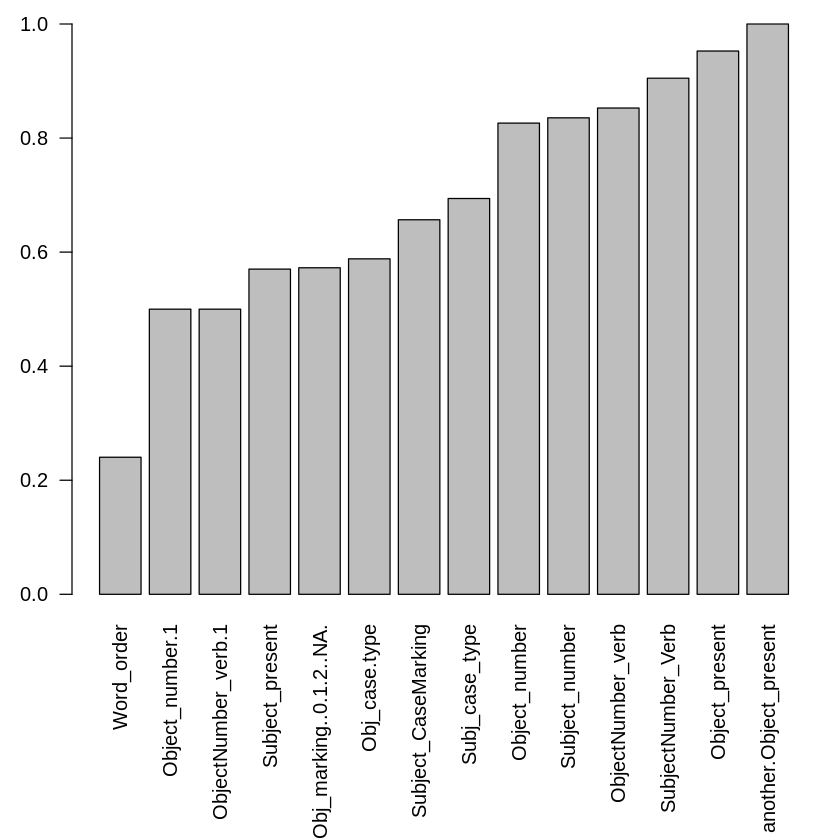

In [49]:
# ranked from least similar to most similar

par(mar = c(10,3,1,1))
barplot(sort(result.vals), las = 2)

In [53]:
# Average results for different children
result.children <- aggregate(similarities~Speaker, data = d.all.agg, mean)
result.children.vals <- result.children$similarities
names(result.children.vals) <- result.children$Speaker

In [54]:
result.children

Speaker  similarities
1 bibars n 0.6111111   
2 dana k   0.7205556   
3 dana t   0.5849436   
4 liana n  0.7948718

In [58]:
# Results for different children and different variables
results.children.variable <- aggregate(similarities~Speaker+variable, data = d.all.agg, mean)
results.children.variable[ order(results.children.variable$Speaker, results.children.variable$variable), ]

Speaker  variable                similarities
1  bibars n Word_order              0.24444444  
5  bibars n Subject_present         0.53333333  
9  bibars n Subject_number          0.75555556  
13 bibars n Subj_case_type          0.18181818  
16 bibars n Subject_CaseMarking     0.36363636  
19 bibars n SubjectNumber_Verb      0.81666667  
23 bibars n Object_present          0.88636364  
27 bibars n Object_number           0.78571429  
31 bibars n Obj_case.type           0.58333333  
35 bibars n Obj_marking..0.1.2..NA. 0.62037037  
39 bibars n ObjectNumber_verb       0.75000000  
2  dana k   Word_order              0.31182796  
6  dana k   Subject_present         0.80645161  
10 dana k   Subject_number          0.81720430  
14 dana k   Subj_case_type          0.70370370  
17 dana k   Subject_CaseMarking     0.64814815  
20 dana k   SubjectNumber_Verb      0.91935484  
24 dana k   Object_present          0.98000000  
28 dana k   Object_number           0.84000000  
32 dana k   Obj_case.type           0.54545455  
36 dana k   Obj_marking..0.1.2..NA. 0.53030303  
40 dana k   ObjectNumber_verb       0.84000000  
43 dana k   another.Object_present  1.00000000  
45 dana k   Object_number.1         0.00000000  
47 dana k   ObjectNumber_verb.1     0.00000000  
3  dana t   Word_order              0.02500000  
7  dana t   Subject_present         0.06666667  
11 dana t   Subject_number          1.00000000  
21 dana t   SubjectNumber_Verb      0.93333333  
25 dana t   Object_present          0.95833333  
29 dana t   Object_number           0.84722222  
33 dana t   Obj_case.type           0.59090909  
37 dana t   Obj_marking..0.1.2..NA. 0.54545455  
41 dana t   ObjectNumber_verb       0.87500000  
4  liana n  Word_order              0.37777778  
8  liana n  Subject_present         0.86666667  
12 liana n  Subject_number          0.88888889  
15 liana n  Subj_case_type          0.87931034  
18 liana n  Subject_CaseMarking     0.77586207  
22 liana n  SubjectNumber_Verb      0.95000000  
26 liana n  Object_present          0.97916667  
30 liana n  Object_number           0.82638889  
34 liana n  Obj_case.type           0.63043478  
38 liana n  Obj_marking..0.1.2..NA. 0.60144928  
42 liana n  ObjectNumber_verb       0.93750000  
44 liana n  another.Object_present  1.00000000  
46 liana n  Object_number.1         1.00000000  
48 liana n  ObjectNumber_verb.1     1.00000000